<a href="https://colab.research.google.com/github/jack-cao-623/clock_face/blob/main/clock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create analog clock given hour and minute

## Libraries

In [ ]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

## Hour hand angles

In [ ]:
# possible hours: 1 thru 12, inclusive
hours = list(range(1,13))

# visually confirm
hours

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
# 1 row per hour
df_hour = pd.DataFrame(hours, columns = ['hour'])

# add column for minute, always 0
df_hour['minute'] = 0

# get angle
df_hour['angle_hour'] = -1 * (((df_hour['hour']-3) % 12) * 30 - 360)

# visually confirm
print(df_hour)

    hour  minute  angle_hour
0      1       0          60
1      2       0          30
2      3       0         360
3      4       0         330
4      5       0         300
5      6       0         270
6      7       0         240
7      8       0         210
8      9       0         180
9     10       0         150
10    11       0         120
11    12       0          90


## Create dataframe containing all possible hour-minute combinations

In [ ]:
# possible minutes: 0 thru 59, inclusive
minutes = list(range(0, 60))

# visulaly confirm first 10 values and last 10 values
print(minutes[:10])
print(minutes[-10:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [ ]:
# possible hour-minute combinations
combinations = list(itertools.product(hours, minutes))

# visulaly confirm first 10 values and last 10 values
print(combinations[:10])
print(combinations[-10:])

[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]
[(12, 50), (12, 51), (12, 52), (12, 53), (12, 54), (12, 55), (12, 56), (12, 57), (12, 58), (12, 59)]


In [ ]:
# as a pandas dataframe
df_clock = pd.DataFrame(combinations, columns = ['hour', 'minute'])

# visually confirm
print(df_clock.head())

# confirm dimensions
print(df_clock.shape)
  # 12 hours * 60 minutes = 720 hour-minute combinations

   hour  minute
0     1       0
1     1       1
2     1       2
3     1       3
4     1       4
(720, 2)


## Get angle for the hour

In [ ]:
# angle for top of each hour; other times don't yet have angle for the hour hand
df_clock = df_clock.merge(df_hour, how = 'left', on = ['hour', 'minute'])
df_clock

,hour,minute,angle_hour
0,1,0,60.0
1,1,1,NaN
2,1,2,NaN
3,1,3,NaN
4,1,4,NaN
...,...,...,...
715,12,55,NaN
716,12,56,NaN
717,12,57,NaN
718,12,58,NaN


In [ ]:
# get angle for non-top of the hour times

# 30 degrees between each hour
# 60 minutes in each hour
# Each minute the hour hand moves 0.5 degrees

# already have angle for top of the hour
# df_clock is already sorted by hour and minute
# so for each missing hour angle, subtract 0.5 degrees to the previous value

for i in range(1, len(df_clock)):
    if pd.isna(df_clock.loc[i, 'angle_hour']):
        df_clock.loc[i, 'angle_hour'] = df_clock.loc[i - 1, 'angle_hour'] - 0.5

In [ ]:
df_clock

,hour,minute,angle_hour
0,1,0,60.0
1,1,1,59.5
2,1,2,59.0
3,1,3,58.5
4,1,4,58.0
...,...,...,...
715,12,55,62.5
716,12,56,62.0
717,12,57,61.5
718,12,58,61.0


## Get angle for the minute

In [ ]:
df_clock['angle_minute'] = 90 - (df_clock['minute'] * 6) % 360
df_clock

,hour,minute,angle_hour,angle_minute
0,1,0,60.0,90
1,1,1,59.5,84
2,1,2,59.0,78
3,1,3,58.5,72
4,1,4,58.0,66
...,...,...,...,...
715,12,55,62.5,-240
716,12,56,62.0,-246
717,12,57,61.5,-252
718,12,58,61.0,-258


## Convert angle to radians

In [ ]:
df_clock['radians_hour'] = df_clock['angle_hour'] * np.pi / 180
df_clock['radians_minute'] = df_clock['angle_minute'] * np.pi / 180
df_clock

,hour,minute,angle_hour,angle_minute,radians_hour,radians_minute
0,1,0,60.0,90,1.047198,1.570796
1,1,1,59.5,84,1.038471,1.466077
2,1,2,59.0,78,1.029744,1.361357
3,1,3,58.5,72,1.021018,1.256637
4,1,4,58.0,66,1.012291,1.151917
...,...,...,...,...,...,...
715,12,55,62.5,-240,1.090831,-4.188790
716,12,56,62.0,-246,1.082104,-4.293510
717,12,57,61.5,-252,1.073377,-4.398230
718,12,58,61.0,-258,1.064651,-4.502949


## x-y coordinates for hour and angle

In [ ]:
# how long is hour hand and minutehand
radius_hour_hand = 1
radius_minute_hand = 2

In [ ]:
df_clock['x_coordinate_hour'] = radius_hour_hand * np.cos(df_clock['radians_hour'])
df_clock['y_coordinate_hour'] = radius_hour_hand * np.sin(df_clock['radians_hour'])

df_clock['x_coordinate_minute'] = radius_minute_hand * np.cos(df_clock['radians_minute'])
df_clock['y_coordinate_minute'] = radius_minute_hand * np.sin(df_clock['radians_minute'])

## Visually check hour hand locations

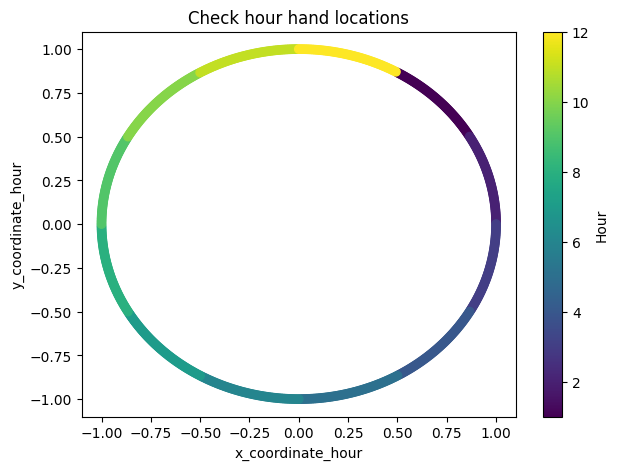

In [ ]:
plt.figure(figsize=(7,5))
plot_minute = plt.scatter(
    x = df_clock['x_coordinate_hour']
    , y = df_clock['y_coordinate_hour']
    , c = df_clock['hour']
    , cmap = 'viridis'
)
plt.colorbar(plot_minute, label = 'Hour')
plt.xlabel('x_coordinate_hour')
plt.ylabel('y_coordinate_hour')
plt.title('Check hour hand locations')
plt.show()

## Visually check minute hand locations

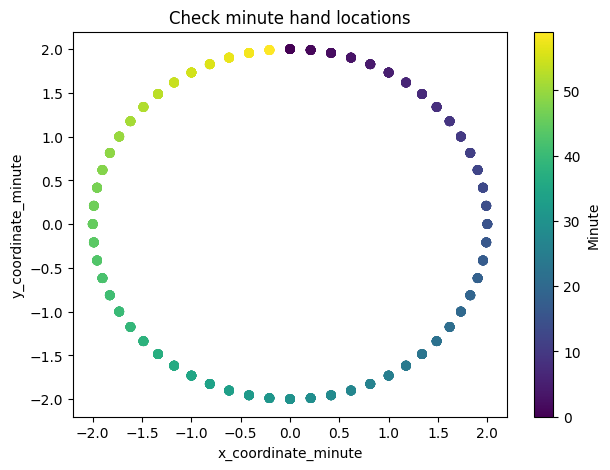

In [ ]:
plt.figure(figsize=(7,5))
plot_minute = plt.scatter(
    x = df_clock['x_coordinate_minute']
    , y = df_clock['y_coordinate_minute']
    , c = df_clock['minute']
    , cmap = 'viridis'
)
plt.colorbar(plot_minute, label = 'Minute')
plt.xlabel('x_coordinate_minute')
plt.ylabel('y_coordinate_minute')
plt.title('Check minute hand locations')
plt.show()

## Reformat df_clock

In [ ]:
# minute hand locations
df_minute_xy = (
    df_clock[
        ['hour', 'minute', 'x_coordinate_minute', 'y_coordinate_minute']
    ]
    .rename(columns = {'x_coordinate_minute': 'x_axis', 'y_coordinate_minute': 'y_axis'})
)

df_minute_xy['hand'] = 'minute'

In [ ]:
# hour hand locations
df_hour_xy = (
    df_clock[
        ['hour', 'minute', 'x_coordinate_hour', 'y_coordinate_hour']
    ]
    .rename(columns = {'x_coordinate_hour': 'x_axis', 'y_coordinate_hour': 'y_axis'})
)

df_hour_xy['hand'] = 'hour'

In [ ]:
# stack on top of each other
df_clock_stacked = (
    pd.concat(
        [df_hour_xy, df_minute_xy]
        , ignore_index = True
    )
    .sort_values(by = ['hour', 'minute'])
    .reset_index(drop = True)
)

#df_clock_stacked['hand_start_or_end'] = 'end'
df_clock_stacked

,hour,minute,x_axis,y_axis,hand
0,1,0,5.000000e-01,0.866025,hour
1,1,0,1.224647e-16,2.000000,minute
2,1,1,5.075384e-01,0.861629,hour
3,1,1,2.090569e-01,1.989044,minute
4,1,2,5.150381e-01,0.857167,hour
...,...,...,...,...,...
1435,12,57,-6.180340e-01,1.902113,minute
1436,12,58,4.848096e-01,0.874620,hour
1437,12,58,-4.158234e-01,1.956295,minute
1438,12,59,4.924236e-01,0.870356,hour


In [ ]:
# add origin for geom_segment
df_clock_stacked['x_start'] = 0
df_clock_stacked['y_start']= 0
df_clock_stacked

,hour,minute,x_axis,y_axis,hand,x_start,y_start
0,1,0,5.000000e-01,0.866025,hour,0,0
1,1,0,1.224647e-16,2.000000,minute,0,0
2,1,1,5.075384e-01,0.861629,hour,0,0
3,1,1,2.090569e-01,1.989044,minute,0,0
4,1,2,5.150381e-01,0.857167,hour,0,0
...,...,...,...,...,...,...,...
1435,12,57,-6.180340e-01,1.902113,minute,0,0
1436,12,58,4.848096e-01,0.874620,hour,0,0
1437,12,58,-4.158234e-01,1.956295,minute,0,0
1438,12,59,4.924236e-01,0.870356,hour,0,0


## Different dataframe for clock circumference/labels

In [ ]:
# separate dataframe for clock circumference/labels
df_hour_circumference = df_hour.copy()
df_hour_circumference['x_axis'] = 3 * np.cos(df_hour_circumference['angle_hour'] * np.pi / 180)
df_hour_circumference['y_axis'] = 3 * np.sin(df_hour_circumference['angle_hour'] * np.pi / 180)
df_hour_circumference.drop(columns = ['angle_hour'], inplace = True)
df_hour_circumference['hand'] = 'N/A'
df_hour_circumference['x_start'] = np.nan
df_hour_circumference['y_start'] = np.nan
df_hour_circumference


,hour,minute,x_axis,y_axis,hand,x_start,y_start
0,1,0,1.500000e+00,2.598076e+00,N/A,NaN,NaN
1,2,0,2.598076e+00,1.500000e+00,N/A,NaN,NaN
2,3,0,3.000000e+00,-7.347881e-16,N/A,NaN,NaN
3,4,0,2.598076e+00,-1.500000e+00,N/A,NaN,NaN
4,5,0,1.500000e+00,-2.598076e+00,N/A,NaN,NaN
5,6,0,-5.510911e-16,-3.000000e+00,N/A,NaN,NaN
6,7,0,-1.500000e+00,-2.598076e+00,N/A,NaN,NaN
7,8,0,-2.598076e+00,-1.500000e+00,N/A,NaN,NaN
8,9,0,-3.000000e+00,3.673940e-16,N/A,NaN,NaN
9,10,0,-2.598076e+00,1.500000e+00,N/A,NaN,NaN


## Specify time

In [ ]:
df_time = pd.concat(
    [df_hour_circumference, df_clock_stacked.query("hour == 4 & minute == 27")]
    , ignore_index = True
)

df_time

,hour,minute,x_axis,y_axis,hand,x_start,y_start
0,1,0,1.500000e+00,2.598076e+00,N/A,NaN,NaN
1,2,0,2.598076e+00,1.500000e+00,N/A,NaN,NaN
2,3,0,3.000000e+00,-7.347881e-16,N/A,NaN,NaN
3,4,0,2.598076e+00,-1.500000e+00,N/A,NaN,NaN
4,5,0,1.500000e+00,-2.598076e+00,N/A,NaN,NaN
5,6,0,-5.510911e-16,-3.000000e+00,N/A,NaN,NaN
6,7,0,-1.500000e+00,-2.598076e+00,N/A,NaN,NaN
7,8,0,-2.598076e+00,-1.500000e+00,N/A,NaN,NaN
8,9,0,-3.000000e+00,3.673940e-16,N/A,NaN,NaN
9,10,0,-2.598076e+00,1.500000e+00,N/A,NaN,NaN


## Add labels

In [ ]:
# add labels

# with hour and minute hands labeled
df_time['label_explicit'] = (
    df_time
      .apply(lambda row: row['hour'] if row['hand'] == 'N/A'
                         else row['minute'] if row['hand'] == 'minute'
                         else row['hour']
             , axis=1
             )
)

# without hour and minute hands labeled
df_time['label_question'] = (
    df_time
      .apply(lambda row: row['hour'] if row['hand'] == 'N/A'
                         else row['minute'] if row['hand'] == '?'
                         else '?'
             , axis=1
             )
)


df_time

,hour,minute,x_axis,y_axis,hand,x_start,y_start,label_explicit,label_question
0,1,0,1.500000e+00,2.598076e+00,N/A,NaN,NaN,1,1
1,2,0,2.598076e+00,1.500000e+00,N/A,NaN,NaN,2,2
2,3,0,3.000000e+00,-7.347881e-16,N/A,NaN,NaN,3,3
3,4,0,2.598076e+00,-1.500000e+00,N/A,NaN,NaN,4,4
4,5,0,1.500000e+00,-2.598076e+00,N/A,NaN,NaN,5,5
5,6,0,-5.510911e-16,-3.000000e+00,N/A,NaN,NaN,6,6
6,7,0,-1.500000e+00,-2.598076e+00,N/A,NaN,NaN,7,7
7,8,0,-2.598076e+00,-1.500000e+00,N/A,NaN,NaN,8,8
8,9,0,-3.000000e+00,3.673940e-16,N/A,NaN,NaN,9,9
9,10,0,-2.598076e+00,1.500000e+00,N/A,NaN,NaN,10,10


## Visualize

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_segment : Removed 12 rows containing missing values.


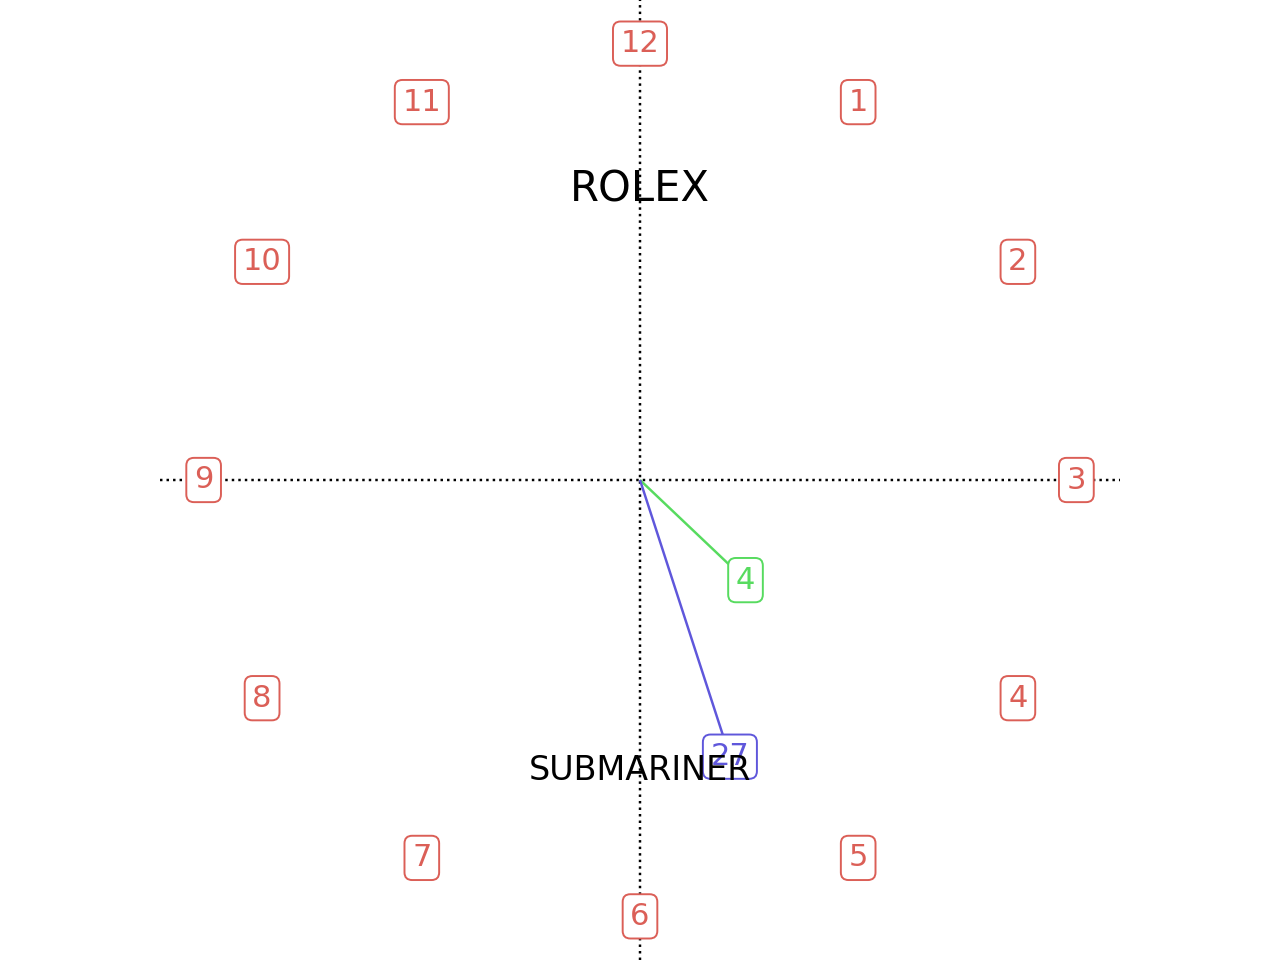

In [ ]:
(
    ggplot(
        df_time
        )
    + geom_vline(xintercept = 0, linetype = 'dotted')
    + geom_hline(yintercept = 0, linetype = 'dotted')
    + geom_segment(
                  mapping = aes(
                                x = 'x_start'
                                , y = 'y_start'
                                , xend = 'x_axis'
                                , yend = 'y_axis'
                                , color = 'hand'
                              )
    )
    + geom_point(
        mapping = aes(x = 'x_axis', y = 'y_axis')
    )
    + geom_label(
        mapping = aes(label = 'label_explicit', x = 'x_axis', y = 'y_axis', color = 'hand')
    )
    + coord_fixed(ratio = 1)
    + annotate('text', x = 0, y = 2, label = 'ROLEX', size = 15)
    + annotate('text', x = 0, y = -2, label = 'SUBMARINER', size = 12)
    + theme_void()
    + theme(legend_position = 'none')

)

## Other stuff bleow

In [ ]:
df_clock_origin = df_clock_stacked.copy()
df_clock_origin['hand_start_or_end'] = 'start'
df_clock_origin['x_axis'] = 0
df_clock_origin['y_axis'] = 0
df_clock_origin

,hour,minute,x_axis,y_axis,hand,x_start,y_start,hand_start_or_end
0,1,0,0,0,hour,0,0,start
1,1,0,0,0,minute,0,0,start
2,1,1,0,0,hour,0,0,start
3,1,1,0,0,minute,0,0,start
4,1,2,0,0,hour,0,0,start
...,...,...,...,...,...,...,...,...
1435,12,57,0,0,minute,0,0,start
1436,12,58,0,0,hour,0,0,start
1437,12,58,0,0,minute,0,0,start
1438,12,59,0,0,hour,0,0,start


In [ ]:
## other stuff below

## Hour markers / clock circumference

In [ ]:
df_hour_circumference = df_hour.copy()
df_hour_circumference['x_axis'] = 3 * np.cos(df_hour_circumference['angle_hour'] * np.pi / 180)
df_hour_circumference['y_axis'] = 3 * np.sin(df_hour_circumference['angle_hour'] * np.pi / 180)
df_hour_circumference.drop(columns = ['angle_hour'], inplace = True)
df_hour_circumference['hand'] = 'N/A'
df_hour_circumference['hand_start_or_end'] = 'N/A'
df_hour_circumference

,hour,minute,x_axis,y_axis,hand,hand_start_or_end
0,1,0,1.500000e+00,2.598076e+00,N/A,N/A
1,2,0,2.598076e+00,1.500000e+00,N/A,N/A
2,3,0,3.000000e+00,-7.347881e-16,N/A,N/A
3,4,0,2.598076e+00,-1.500000e+00,N/A,N/A
4,5,0,1.500000e+00,-2.598076e+00,N/A,N/A
5,6,0,-5.510911e-16,-3.000000e+00,N/A,N/A
6,7,0,-1.500000e+00,-2.598076e+00,N/A,N/A
7,8,0,-2.598076e+00,-1.500000e+00,N/A,N/A
8,9,0,-3.000000e+00,3.673940e-16,N/A,N/A
9,10,0,-2.598076e+00,1.500000e+00,N/A,N/A


## Final dataframe

In [ ]:
df_clock_final = (
    pd.concat(
              [df_clock_origin, df_clock_stacked]
              , ignore_index = True
    )
    .sort_values(by = ['hour', 'minute', 'hand'])
    .reset_index(drop = True)
)

df_clock_final

,hour,minute,x_axis,y_axis,hand,x_start,y_start,hand_start_or_end
0,1,0,0.000000e+00,0.000000,hour,0,0,start
1,1,0,5.000000e-01,0.866025,hour,0,0,NaN
2,1,0,0.000000e+00,0.000000,minute,0,0,start
3,1,0,1.224647e-16,2.000000,minute,0,0,NaN
4,1,1,0.000000e+00,0.000000,hour,0,0,start
...,...,...,...,...,...,...,...,...
2875,12,58,-4.158234e-01,1.956295,minute,0,0,NaN
2876,12,59,0.000000e+00,0.000000,hour,0,0,start
2877,12,59,4.924236e-01,0.870356,hour,0,0,NaN
2878,12,59,0.000000e+00,0.000000,minute,0,0,start


## Visualize

In [ ]:
df_to_viz = pd.concat(
    [df_clock_final.query("hour == 9 & minute == 55"), df_hour_circumference]
    , ignore_index = True
)

df_to_viz

,hour,minute,x_axis,y_axis,hand,x_start,y_start,hand_start_or_end
0,9,55,0.000000e+00,0.000000e+00,hour,0.0,0.0,start
1,9,55,-8.870108e-01,4.617486e-01,hour,0.0,0.0,NaN
2,9,55,0.000000e+00,0.000000e+00,minute,0.0,0.0,start
3,9,55,-1.000000e+00,1.732051e+00,minute,0.0,0.0,NaN
4,1,0,1.500000e+00,2.598076e+00,N/A,NaN,NaN,N/A
5,2,0,2.598076e+00,1.500000e+00,N/A,NaN,NaN,N/A
6,3,0,3.000000e+00,-7.347881e-16,N/A,NaN,NaN,N/A
7,4,0,2.598076e+00,-1.500000e+00,N/A,NaN,NaN,N/A
8,5,0,1.500000e+00,-2.598076e+00,N/A,NaN,NaN,N/A
9,6,0,-5.510911e-16,-3.000000e+00,N/A,NaN,NaN,N/A


In [ ]:
(
    ggplot(
        df_to_viz
        , mapping = aes(
                        x = 'x_axis'
                        , y = 'y_axis'
                        #, group = 'hand'
                        , color = 'hand'
                      )
        )
    + geom_point()
    + geom_segment()
    + geom_point()
    + coord_cartesian(xlim = (-3, 3), ylim = (-3, 3))
    + geom_vline(xintercept = 0, linetype = 'dotted')
    + geom_hline(yintercept = 0, linetype = 'dotted')
    + theme_void()

)

PlotnineError: 'geom_segment requires the following missing aesthetics: yend, xend'

## Extract specific time

In [ ]:
(
    df_clock_final
    .query("hour == 12 & minute == 0")
    #.plot(kind = "scatter", x = 'x_axis', y = 'y_axis')
)

,hour,minute,x_axis,y_axis,hand,x_start,y_start,hand_start_or_end
2640,12,0,0.000000e+00,0.0,hour,0,0,start
2641,12,0,6.123234e-17,1.0,hour,0,0,NaN
2642,12,0,0.000000e+00,0.0,minute,0,0,start
2643,12,0,1.224647e-16,2.0,minute,0,0,NaN


In [ ]:
df_clock.query("hour == 3 & minute == 0")[['hour', 'minute', 'x_coordinate_hour', 'y_coordinate_hour', 'y_coordinate_minute', 'x_coordinate_minute']]

,hour,minute,x_coordinate_hour,y_coordinate_hour,y_coordinate_minute,x_coordinate_minute
120,3,0,1.0,-2.449294e-16,2.0,1.224647e-16


In [ ]:
df_clock

,hour,minute,angle_hour,angle_minute,radians_hour,radians_minute,x_coordinate_hour,y_coordinate_hour,x_coordinate_minute,y_coordinate_minute
0,1,0,60.0,90,1.047198,1.570796,0.500000,0.866025,1.224647e-16,2.000000
1,1,1,59.5,84,1.038471,1.466077,0.507538,0.861629,2.090569e-01,1.989044
2,1,2,59.0,78,1.029744,1.361357,0.515038,0.857167,4.158234e-01,1.956295
3,1,3,58.5,72,1.021018,1.256637,0.522499,0.852640,6.180340e-01,1.902113
4,1,4,58.0,66,1.012291,1.151917,0.529919,0.848048,8.134733e-01,1.827091
...,...,...,...,...,...,...,...,...,...,...
715,12,55,62.5,-240,1.090831,-4.188790,0.461749,0.887011,-1.000000e+00,1.732051
716,12,56,62.0,-246,1.082104,-4.293510,0.469472,0.882948,-8.134733e-01,1.827091
717,12,57,61.5,-252,1.073377,-4.398230,0.477159,0.878817,-6.180340e-01,1.902113
718,12,58,61.0,-258,1.064651,-4.502949,0.484810,0.874620,-4.158234e-01,1.956295
